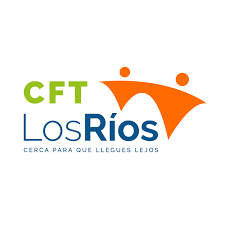

## Curso: Aprendizaje Supervisado
## Profesor: Diego Miranda Olavarría
#### Data Scientist

In [1]:
import pandas as pd

data = pd.read_csv('student.csv')

data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Analisis Exploratorio de Datos

In [2]:
data.shape

(2392, 15)

In [3]:
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [4]:
data.columns.values

array(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
data.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## Machine Learning

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
X = data.drop('GradeClass', axis=1) 
y = data['GradeClass']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
# Definimos el modelo
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = knn.predict(X_test)

In [11]:
y_pred

array([4., 2., 0., 2., 4., 2., 4., 4., 2., 4., 1., 4., 1., 2., 2., 4., 4.,
       4., 4., 4., 2., 4., 4., 0., 4., 4., 4., 2., 3., 4., 2., 4., 1., 1.,
       4., 3., 1., 1., 3., 4., 1., 0., 4., 3., 4., 2., 2., 4., 0., 4., 0.,
       2., 4., 4., 0., 0., 0., 2., 4., 2., 1., 4., 1., 4., 4., 0., 3., 0.,
       4., 2., 1., 4., 4., 1., 4., 0., 2., 4., 4., 4., 4., 4., 1., 4., 3.,
       4., 2., 4., 0., 4., 3., 4., 4., 4., 3., 4., 0., 4., 4., 4., 4., 2.,
       4., 1., 4., 4., 3., 4., 4., 4., 2., 3., 1., 4., 4., 4., 3., 4., 4.,
       4., 4., 3., 2., 4., 2., 4., 4., 4., 4., 1., 4., 2., 3., 4., 4., 4.,
       2., 4., 4., 4., 2., 2., 2., 4., 2., 4., 4., 2., 0., 4., 0., 4., 1.,
       4., 4., 4., 4., 4., 4., 0., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4.,
       4., 1., 0., 4., 4., 1., 1., 4., 2., 4., 1., 2., 4., 0., 1., 1., 2.,
       1., 4., 1., 4., 4., 4., 4., 3., 4., 4., 2., 2., 2., 4., 2., 2., 2.,
       1., 4., 4., 1., 4., 4., 4., 4., 3., 1., 0., 4., 2., 1., 4., 1., 4.,
       0., 0., 4., 4., 4.

In [12]:
# Librería para calcular la matríz de confusión y las métricas de evaluación
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [13]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[  7,  14,   5,   6,   1],
       [ 18,  23,  25,   8,   6],
       [ 11,  37,  39,  22,  12],
       [  6,  21,  37,  23,  40],
       [  6,  11,  13,  18, 309]], dtype=int64)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.15      0.21      0.17        33
         1.0       0.22      0.29      0.25        80
         2.0       0.33      0.32      0.32       121
         3.0       0.30      0.18      0.23       127
         4.0       0.84      0.87      0.85       357

    accuracy                           0.56       718
   macro avg       0.37      0.37      0.36       718
weighted avg       0.56      0.56      0.55       718



## KNN con ajuste de hiperparámetros

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
# Definimos los parámetros
param_grid = {
    'n_neighbors': [3, 5, 7, 9],                   # Número de vecinos
    'weights': ['uniform', 'distance'],             # Ajustar pesos
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Métrica de distancia
    'p': [1, 2],                                   # Parámetro de la distancia de Minkowski
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmo para búsqueda de vecinos
    'leaf_size': [10, 20, 30, 40, 50],             # Tamaño de las hojas para Ball Tree o KD Tree
    'n_jobs': [-1]                                 # Usar todos los procesadores disponibles
}

# Configura el ajuste de hiperparámetros con validación cruzada (GridSearchCV)
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Ajusta el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.55615293 0.57646356 0.55615293 0.57646356 0.56391876 0.58124253
 0.56391876 0.58124253 0.56391876 0.57407407 0.56391876 0.57407407
 0.55913978 0.57108722 0.55913978 0.57108722 0.5692951  0.59737157
 0.5692951  0.59737157 0.59617682 0.61111111 0.59617682 0.61111111
 0.59976105 0.6051374  0.59976105 0.6051374  0.58422939 0.59378734
 0.58422939 0.59378734 0.5692951  0.59737157 0.55615293 0.57646356
 0.59617682 0.61111111 0.56391876 0.58124253 0.59976105 0.6051374
 0.56391876 0.57407407 0.58422939 0.59378734 0.55913978 0.57108722
 0.55615293 0.57646356 0.55615293 0.57646356 0.56391876 0.58124253
 0.56391876 0.58124253 0.56391876 0.57407407 0.56391876 0.57407407
 0.55913978 0.57108722 0.55913978 0.57108722 0.5692951  0.59737157
 0.5692951  0.59737157 0.59617682 0.61111111 0.59617682 0.61111111
 0.59976105 0.6051374  0.59976105 0.6051374  0.58422

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_jobs': [-1], 'n_neighbors': [3, 5, 7, 9],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [17]:
# Utilizar el mejor modelo encontrado por GridSearchCV
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
y_pred

array([4., 2., 0., 2., 4., 2., 4., 4., 2., 4., 1., 4., 1., 2., 4., 4., 4.,
       4., 4., 4., 2., 4., 4., 0., 4., 4., 4., 2., 4., 4., 4., 4., 2., 2.,
       4., 4., 1., 4., 3., 4., 1., 1., 4., 3., 4., 2., 3., 4., 0., 4., 1.,
       2., 4., 4., 3., 1., 3., 4., 4., 2., 4., 4., 1., 4., 4., 4., 3., 2.,
       4., 2., 1., 4., 4., 2., 4., 2., 4., 4., 4., 4., 4., 1., 1., 4., 3.,
       4., 2., 4., 0., 4., 3., 4., 4., 4., 3., 4., 1., 4., 4., 4., 4., 2.,
       4., 2., 4., 4., 3., 4., 4., 4., 4., 3., 1., 4., 4., 4., 3., 0., 4.,
       2., 4., 2., 2., 4., 4., 4., 2., 4., 4., 1., 4., 2., 1., 4., 4., 4.,
       2., 4., 4., 4., 2., 4., 2., 4., 2., 4., 4., 4., 0., 4., 1., 4., 2.,
       4., 4., 4., 4., 4., 4., 0., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4.,
       4., 3., 1., 4., 4., 2., 3., 4., 3., 4., 1., 4., 4., 1., 2., 1., 2.,
       1., 4., 3., 4., 4., 4., 4., 3., 4., 4., 2., 2., 4., 4., 2., 2., 2.,
       3., 4., 4., 2., 3., 4., 4., 4., 3., 2., 2., 4., 2., 1., 4., 1., 4.,
       3., 0., 4., 4., 4.

In [18]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[  3  11  12   4   3]
 [  5  21  39   9   6]
 [  3  25  50  25  18]
 [  4   8  26  38  51]
 [  3   6   3  24 321]]


In [19]:
# Calcular y mostrar el reporte de clasificación (precisión, recall, F1-score, etc.)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.17      0.09      0.12        33
         1.0       0.30      0.26      0.28        80
         2.0       0.38      0.41      0.40       121
         3.0       0.38      0.30      0.33       127
         4.0       0.80      0.90      0.85       357

    accuracy                           0.60       718
   macro avg       0.41      0.39      0.40       718
weighted avg       0.57      0.60      0.58       718



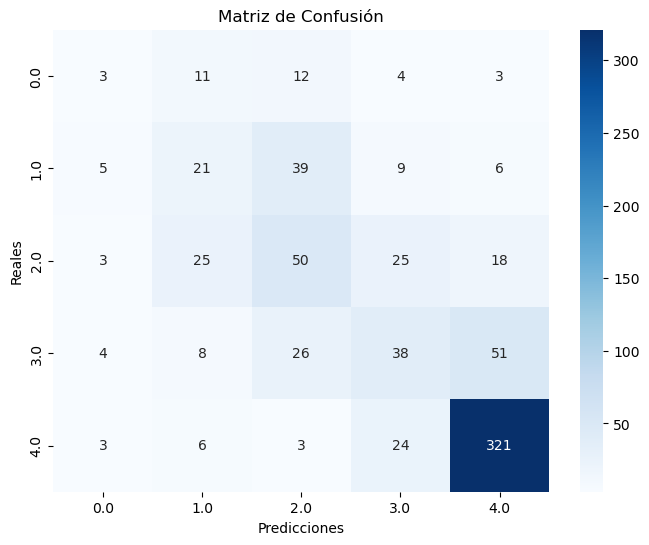

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Obtener los nombres de las clases
class_names = np.unique(y_test)

# Crear la gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Agregar títulos y etiquetas
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Reales')

# Mostrar la gráfica
plt.show()